# Introdução

Após vários tratamentos os dados foram submetidos para teste com 3 algoritmos diferentes para teste e validação de performance.
Após vários testes de performance dos algoritmos foi constatado que a classe desbalanceada estava prejudicando a performance dos modelos.
Foram aplicadas técnicas como estratificação, eliminação aleatória de dados com OverSampler e penalização das redes neurais por erros da classe minoritária..
Ao final há uma tabela simples com a métrica principal dos modelos com os dados de validação..

In [1]:
#Importação das bibliotecas
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.regularizers import l2
from sklearn.metrics import f1_score, precision_score, confusion_matrix, accuracy_score, recall_score, classification_report
from tpot import TPOTClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
#Primeira visualização dos dados
train_dataset = pd.read_csv('validation.csv')
train_dataset

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,22,Private,174043,HS-grad,9,Never-married,Craft-repair,Not-in-family,White,Male,0,0,50,United-States,<=50K
1,50,State-gov,159219,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,Canada,>50K
2,18,?,192399,Some-college,10,Never-married,?,Own-child,White,Male,0,0,60,United-States,<=50K
3,33,Federal-gov,193246,Bachelors,13,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,42,United-States,>50K
4,23,Private,61777,Bachelors,13,Married-civ-spouse,Sales,Husband,White,Male,2580,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7321,47,Federal-gov,211123,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
7322,51,Local-gov,123011,Masters,14,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,1977,35,United-States,>50K
7323,21,Private,195919,10th,6,Never-married,Handlers-cleaners,Not-in-family,Other,Male,0,0,40,Dominican-Republic,<=50K
7324,56,Federal-gov,255386,Some-college,10,Married-civ-spouse,Adm-clerical,Husband,Asian-Pac-Islander,Male,0,0,40,Laos,<=50K


In [3]:
#Separação das colunas categóricas e numéricas para tratamento adequado
colunas_categoricas = ['workclass','education','marital-status','occupation','relationship','race','gender','native-country']
colunas_numericas = ['age','fnlwgt','educational-num','capital-gain','capital-loss','hours-per-week']

## Análise e Visualização Gráfica

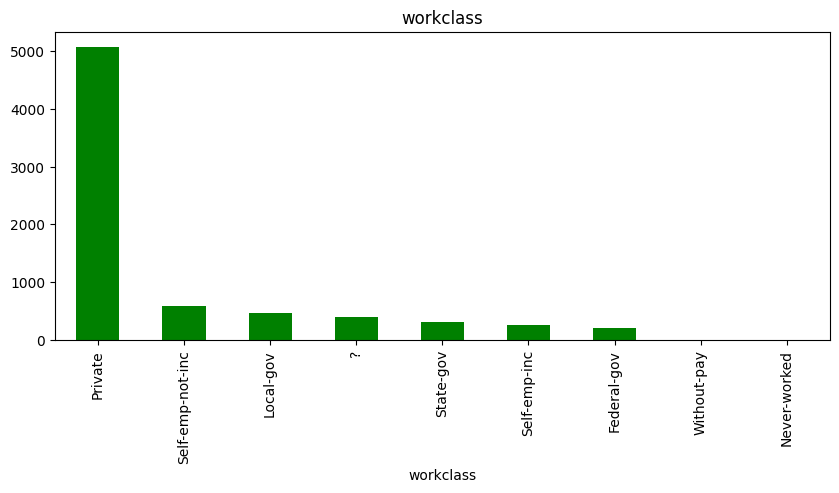

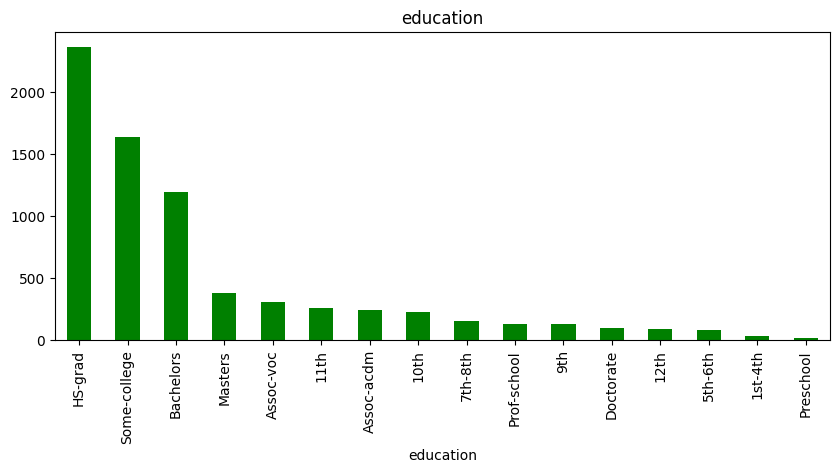

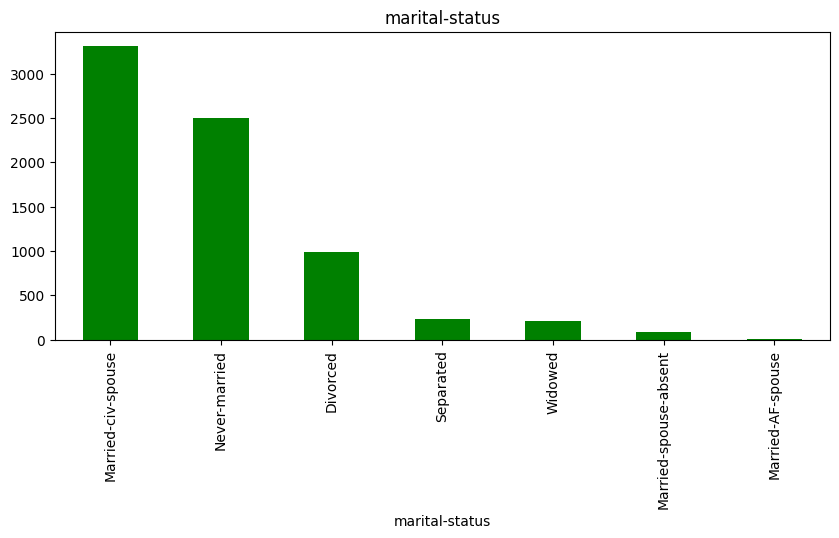

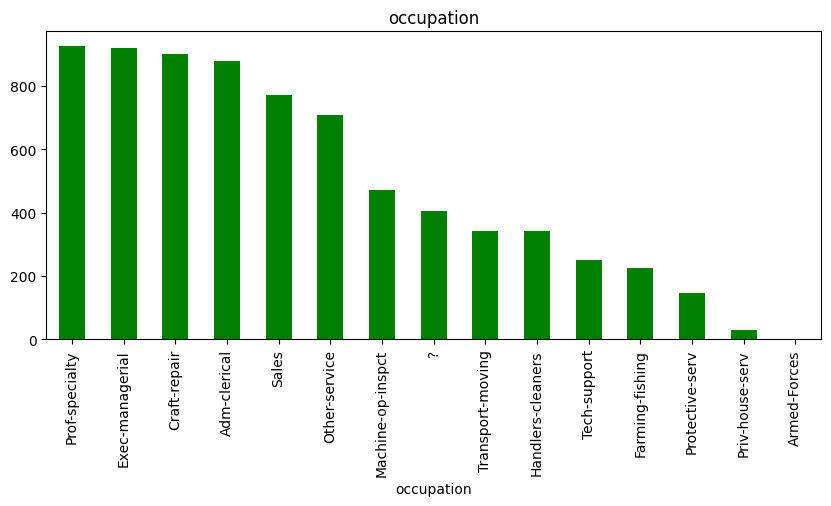

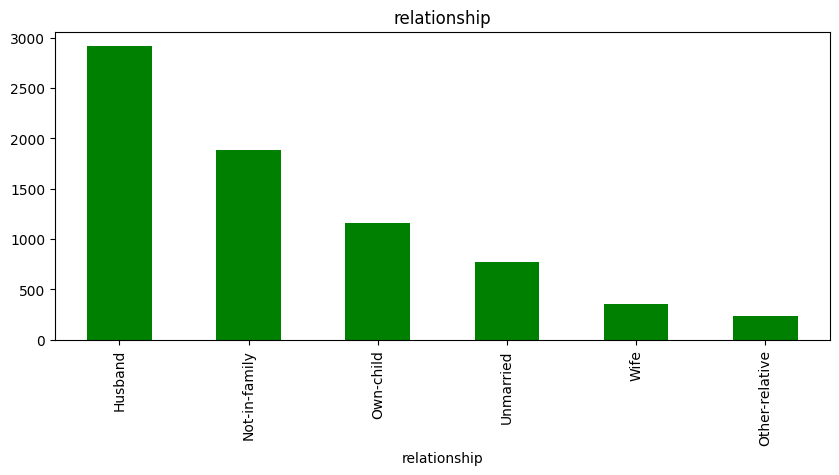

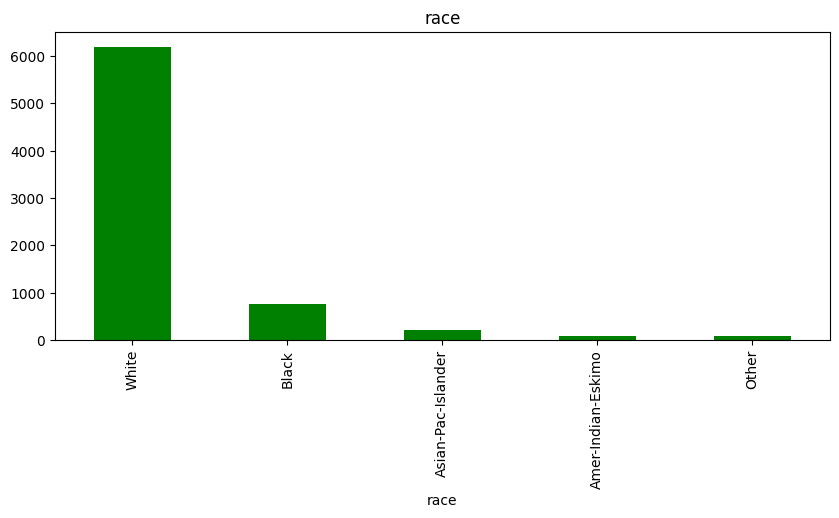

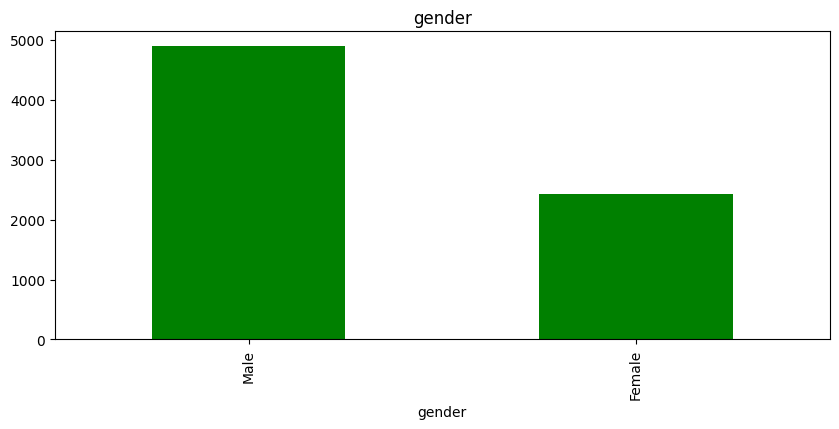

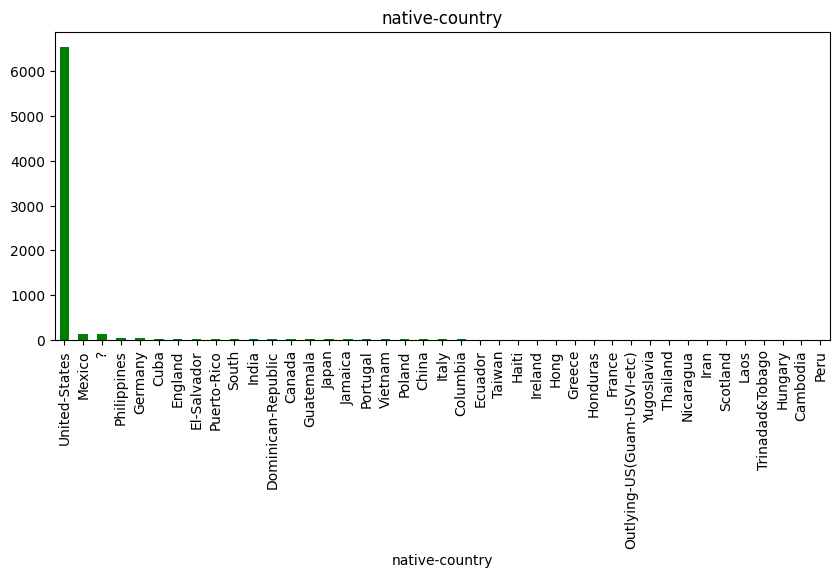

In [4]:
#Visualização gráfica dos dados categóricos para análise e detecção de problemas
for coluna in colunas_categoricas:
    train_dataset[coluna].value_counts().plot(kind = 'bar', color = 'green', figsize=(10,4))
    plt.title(coluna)
    plt.show()

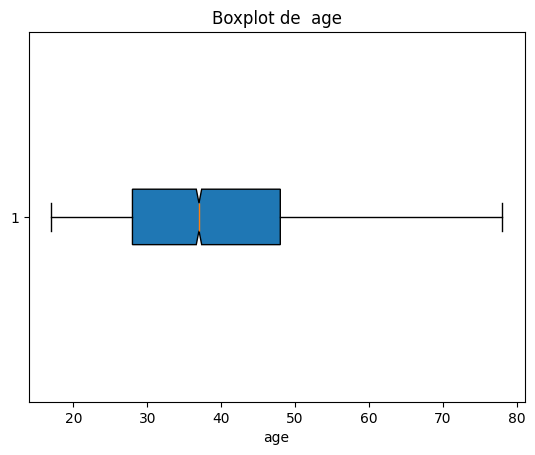

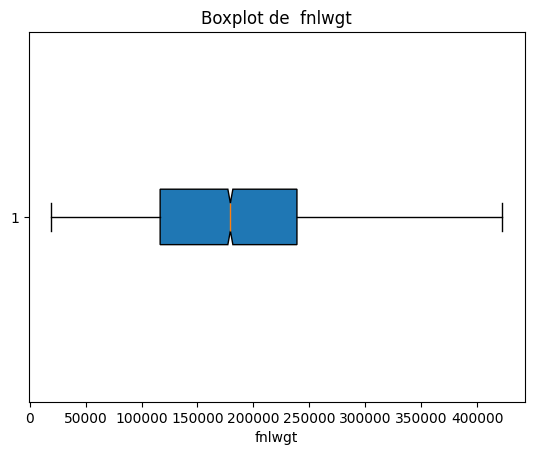

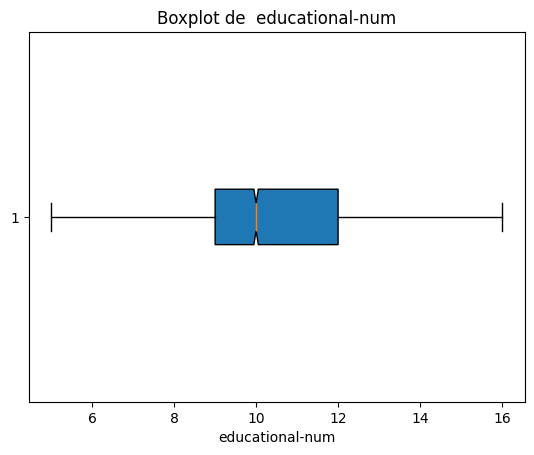

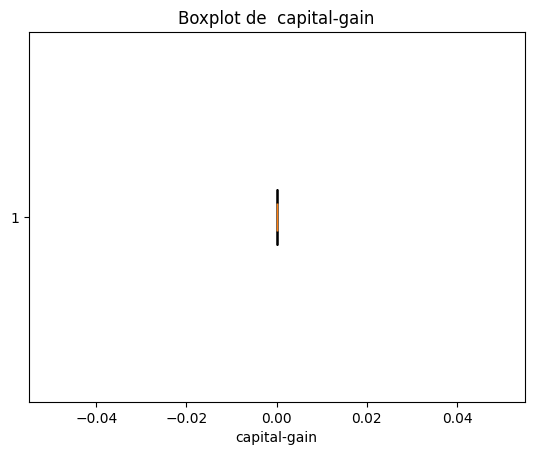

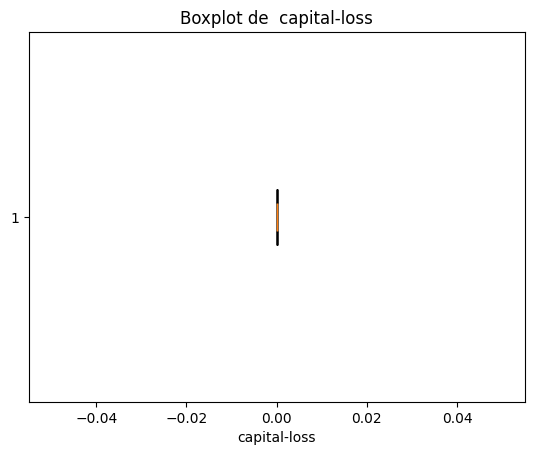

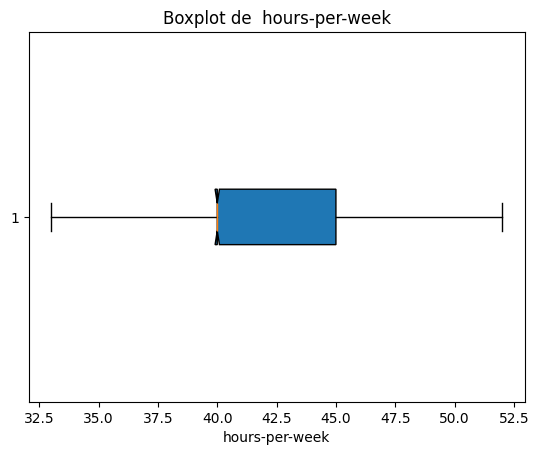

In [5]:
#Visualização gráfica dos dados numéricos para análise e detecção de outliers
for coluna in colunas_numericas:
    plt.boxplot(train_dataset[coluna], notch = True, showfliers = False, vert = False, patch_artist = True)
    plt.title(f'Boxplot de  {coluna}')
    plt.xlabel(coluna)
    plt.show()

### Análise Estatística

In [6]:
#Distribuição dos dados estatisticamente
for values in train_dataset.columns:
    if train_dataset[values].dtype == 'int64' or train_dataset[values].dtype == 'float64':
        desc = train_dataset[values].describe()
        print(f"Distribuição estatística de {values} \n ")
        print(desc)

Distribuição estatística de age 
 
count    7326.00000
mean       38.59050
std        13.63951
min        17.00000
25%        28.00000
50%        37.00000
75%        48.00000
max        90.00000
Name: age, dtype: float64
Distribuição estatística de fnlwgt 
 
count    7.326000e+03
mean     1.901315e+05
std      1.069039e+05
min      1.930200e+04
25%      1.166420e+05
50%      1.793520e+05
75%      2.388020e+05
max      1.490400e+06
Name: fnlwgt, dtype: float64
Distribuição estatística de educational-num 
 
count    7326.000000
mean       10.055283
std         2.585510
min         1.000000
25%         9.000000
50%        10.000000
75%        12.000000
max        16.000000
Name: educational-num, dtype: float64
Distribuição estatística de capital-gain 
 
count     7326.000000
mean      1094.352034
std       7492.010614
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      99999.000000
Name: capital-gain, dtype: float64
Distribuição estatística de 

Tratamento nos dados

## Tratamento nos Dados

In [7]:
train_dataset.groupby(train_dataset['occupation']).size()

occupation
?                    405
Adm-clerical         880
Armed-Forces           2
Craft-repair         901
Exec-managerial      920
Farming-fishing      226
Handlers-cleaners    341
Machine-op-inspct    472
Other-service        709
Priv-house-serv       30
Prof-specialty       926
Protective-serv      148
Sales                771
Tech-support         252
Transport-moving     343
dtype: int64

In [8]:
train_dataset.loc[train_dataset['occupation'] == '?', 'occupation'] = 'Prof-specialty'
train_dataset.loc[train_dataset['occupation'] == '?']       

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income


In [9]:
train_dataset.loc[train_dataset['workclass'] == '?']

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
2,18,?,192399,Some-college,10,Never-married,Prof-specialty,Own-child,White,Male,0,0,60,United-States,<=50K
8,82,?,52921,Some-college,10,Widowed,Prof-specialty,Not-in-family,Amer-Indian-Eskimo,Male,0,0,3,United-States,<=50K
37,18,?,98549,HS-grad,9,Never-married,Prof-specialty,Own-child,White,Female,0,1602,35,United-States,<=50K
44,63,?,310396,9th,5,Married-civ-spouse,Prof-specialty,Husband,White,Male,5178,0,40,United-States,>50K
46,20,?,133061,9th,5,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,68,?,140282,7th-8th,4,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,8,United-States,<=50K
7281,80,?,29020,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,10605,0,10,United-States,>50K
7289,18,?,36064,12th,8,Never-married,Prof-specialty,Own-child,White,Male,0,0,20,United-States,<=50K
7304,73,?,131982,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,5,Vietnam,<=50K


In [10]:
train_dataset.loc[train_dataset['workclass'] == '?', 'workclass'] = 'Private'
train_dataset.loc[train_dataset['workclass'] == '?']

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income


In [11]:
media = train_dataset.loc[(train_dataset['capital-gain'] > 0)| (train_dataset['capital-gain'] < 50000),'capital-gain'].mean().astype('int64')
media

1094

In [12]:
train_dataset.loc[train_dataset['capital-gain'] > 15000, 'capital-gain'] = media
train_dataset.loc[train_dataset['capital-gain'] > 15000]

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income


In [13]:
train_dataset['capital-gain'].describe()

count     7326.000000
mean       376.347939
std       1566.935190
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      14344.000000
Name: capital-gain, dtype: float64

### Divisão dos Dados e Engenharia de Atributos

In [14]:
X = train_dataset.iloc[:,:-1]
y = train_dataset.iloc[:,-1]

In [15]:
sc = StandardScaler()
numerical = X.select_dtypes(include = ['int64', 'float64']).columns
X[numerical] = sc.fit_transform(X[numerical])

labelencoder = LabelEncoder()
categorical = X.select_dtypes(include = 'object').columns
for col in categorical:
    X[col] = labelencoder.fit_transform(X[col])

In [16]:
train_dataset.head(1)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,22,Private,174043,HS-grad,9,Never-married,Craft-repair,Not-in-family,White,Male,0,0,50,United-States,<=50K


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 32)

In [18]:
floresta = RandomForestClassifier(n_estimators = 200)
selector = RFE(floresta, n_features_to_select = 7)
selector.fit(X,y)
X_train = selector.transform(X_train)
X_test = selector.transform(X_test)

In [19]:
print(selector.support_)
print(selector.ranking_)

[ True False  True False  True False  True  True False False  True False
  True False]
[1 3 1 4 1 2 1 1 7 8 1 5 1 6]


## Treinamento dos Modelos

### Florestas Aleatórias

In [20]:
#Random Forest
forest = RandomForestClassifier(n_estimators = 200, max_leaf_nodes = 7, max_depth = 7)
forest.fit(X_train, y_train)
y_pred = forest.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       <=50K       0.84      0.97      0.90      1676
        >50K       0.79      0.42      0.55       522

    accuracy                           0.84      2198
   macro avg       0.82      0.69      0.72      2198
weighted avg       0.83      0.84      0.82      2198



### Redes Neurais Artificiais

In [21]:
labelencoder_y = LabelEncoder()
y_train = labelencoder_y.fit_transform(y_train)
y_test = labelencoder_y.fit_transform(y_test)

In [22]:
model = Sequential()

model.add(Dense(units = 128, kernel_regularizer = l2(0.01), activation = 'relu', input_dim = X_train.shape[1]))
model.add(Dropout(0.1))
model.add(Dense(units = 128, kernel_regularizer = l2(0.01), activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(units = 128, kernel_regularizer = l2(0.01), activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(units = 128, kernel_regularizer = l2(0.01), activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(units = 1, kernel_regularizer = l2(0.01), activation = 'sigmoid'))
optimizer = Adam(learning_rate = 0.001)
model.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])
es = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 2, patience = 50, restore_best_weights = True)
model.fit(X_train, y_train, epochs = 100, callbacks = [es], validation_data=(X_test, y_test))

Epoch 1/100


C:\Users\roni_\anaconda3\envs\redes_neurais\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


161/161 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7451 - loss: 2.9852 - val_accuracy: 0.8089 - val_loss: 0.8431
Epoch 2/100
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8140 - loss: 0.7060 - val_accuracy: 0.8148 - val_loss: 0.5528
Epoch 3/100
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8179 - loss: 0.5290 - val_accuracy: 0.8162 - val_loss: 0.5071
Epoch 4/100
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8204 - loss: 0.4812 - val_accuracy: 0.8085 - val_loss: 0.5156
Epoch 5/100
161/161 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8130 - loss: 0.4921 - val_accuracy: 0.8112 - val_loss: 0.5016
Epoch 6/100
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8222 - loss: 0.4832 - val_accuracy: 0.8107 - val_loss: 0.5029
Epoch 7/100
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8335 - loss: 0.4559 - val_accuracy: 0.8253 - val_loss: 0.4764
Epoch 8/100
161/161 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8244 - loss: 0.4797 - val_accuracy: 0.8226

In [23]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         1,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 152,069 (594.02 KB)

 Trainable params: 50,689 (198.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 101,380 (396.02 KB)

### TPOT

In [24]:
y_pred = model.predict(X_test)

y_pred = (y_pred > 0.5)

confusion = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

print(f"Matriz de Confusão: \n {confusion} \n Acurácia: {accuracy} \n F1_Score: {f1} \n Precision: {precision}")

69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Matriz de Confusão: 
 [[1585   91]
 [ 265  257]] 
 Acurácia: 0.83803457688808 
 F1_Score: 0.5908045977011495 
 Precision: 0.7385057471264368


In [25]:
tpot = TPOTClassifier(
    generations = 100,
    population_size = 100,
    offspring_size = 50,
    crossover_rate = 0.1,
    mutation_rate = 0.7,
    scoring = 'accuracy',
    max_time_mins = 20,
    early_stop = False,
    verbosity = 2
)

tpot.fit(X_train, y_train)

                                                                              
Generation 1 - Current best internal CV score: 0.8549118052584035
                                                                              
The optimized pipeline was not improved after evaluating False more generations. Will end the optimization process.

TPOT closed prematurely. Will use the current best pipeline.
                                                                              
Best pipeline: GradientBoostingClassifier(input_matrix, learning_rate=0.1, max_depth=4, max_features=0.55, min_samples_leaf=6, min_samples_split=8, n_estimators=100, subsample=0.6000000000000001)


TPOTClassifier(early_stop=False, max_time_mins=20, mutation_rate=0.7,
               offspring_size=50, scoring='accuracy', verbosity=2)

In [26]:
tpot_pred = tpot.predict(X_test)
print(classification_report(y_test, tpot_pred))

              precision    recall  f1-score   support

           0       0.88      0.94      0.91      1676
           1       0.76      0.60      0.67       522

    accuracy                           0.86      2198
   macro avg       0.82      0.77      0.79      2198
weighted avg       0.85      0.86      0.85      2198



### Métricas dos Modelos

In [30]:
lista = {
'f1_Score': [72,59,79]
}
idx = ['Florestas Aleatórias', "Redes Neurais Artificiais", 'TPOT']
metricas = pd.DataFrame( data = lista, index = idx)

In [31]:
metricas

,f1_Score
Florestas Aleatórias,72
Redes Neurais Artificiais,59
TPOT,79
